In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import TomekLinks

In [2]:
parkinsons_dataset = pd.read_csv("../../datasets/parkinsons.csv")

In [3]:
parkinsons_dataset.drop('name', axis=1, inplace=True)  # Drop the 'name' column
X = parkinsons_dataset.drop(columns=['status'], axis=1)  # Features
y = parkinsons_dataset['status']

In [4]:
print(parkinsons_dataset['status'].value_counts())

status
1    147
0     48
Name: count, dtype: int64


In [5]:
tomek = TomekLinks()
X_resampled, y_resampled = tomek.fit_resample(X, y)

In [6]:
print(f"Resampled class distribution:\n{pd.Series(y_resampled).value_counts()}")


Resampled class distribution:
status
1    141
0     48
Name: count, dtype: int64


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [16]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [9]:
y_pred = model.predict(X_test)
print(f'Random Forest Accuracy: {accuracy_score(Y_test, y_pred):.4f}')

Random Forest Accuracy: 0.9211


In [10]:
conf_matrix = confusion_matrix(Y_test, y_pred)

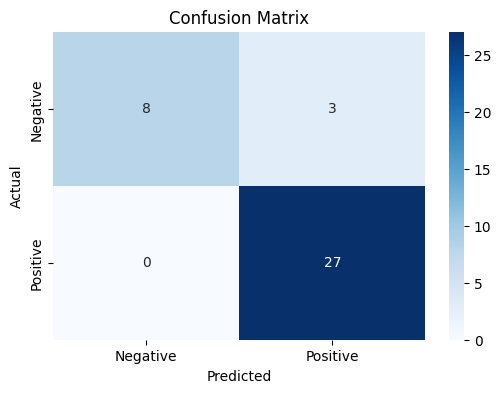

In [11]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [12]:
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)


In [14]:
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')


Precision: 0.9000
Recall: 1.0000
F1-Score: 0.9474


In [15]:
import pickle
file_name = 'new_parkinsons_model.sav'
pickle.dump(model, open(file_name, 'wb'))